# Shapely and Geometry Objects

Lecture-1 Auto-GIS: https://autogis-site.readthedocs.io/en/latest/lessons/lesson-1/geometry-objects.html

Shapely's Docs: https://shapely.readthedocs.io/en/stable/


Spatial Data Model

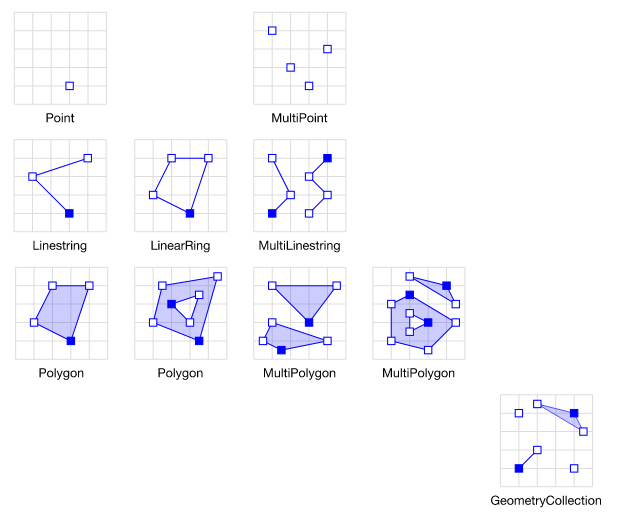

+ Shapely is the standard library for working with geo-spatial objects.
+ Libraries like geopandas -> higher level abstractions on shapely
+ shapely follows the data model according to the open geospatial consortium's (OGC) simple feature access standard.

Definition of Geometric Objects using coordinate tuples.

coordinate tuples - $(x, y)$ 2-D or $(x, y, z)$ 3-D

<b> Points </b>
 - Geometries represented by single point
 - defined by a single coordinate tuple

<b> LineStrings </b>
 - aka **LinearRings** represent lines
 - line is a sequence of points, connected in order
 - if first and last point are same -> linear ring
 - Min. of 2 points for a LineString
 - Min. of 3 points for a LinearRing

<b> Polygons </b>
 - Represent an area
 - defined by exactly one LinearRing as its circumference and any number of LinearRings **representing holes** cut out.
 - The coordinates of holes have to lie within the exterior linear ring and must not intersect each other

<b> collection of geometries </b>
 - MultiPoint - GNSS site, bore well sites, cities
 - MultiPolygon - countries, states, farmlands
 - MultiLineString - roads, 


# Using Shapely

In [2]:
import shapely
from shapely.geometry import Point

## 1. Creation of geometries using shapely

### 1.1 Point Geometries

POINT (1.14 -3) is a <class 'shapely.geometry.point.Point'>


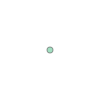

In [8]:
#point geometries
p1 = Point(1.14, -3)
print(f"{p1} is a {type(p1)}")
p1

POINT Z (1.14 3 -2) is a <class 'shapely.geometry.point.Point'>


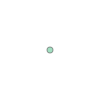

In [23]:
#point geometries
p2 = Point(1.14, 3, -2)
print(f"{p2} is a {type(p2)}")
p2

This text representation is in "Well-Known Text" (WKT)

#### 1.2 Point Properties and Method

In [12]:
# get the geoetry type
p1.geom_type

'Point'

In [18]:
# get the coordinates
list(p1.coords)

[(1.14, -3.0)]

In [21]:
# also call out the x, y, z coordinates 
print(f"P1 has x= {p1.x}, y={p1.y},")

P1 has x= 1.14, y=-3.0,


In [24]:
# calculate distance b/w two point objects
# distance will depend on coordinate referene system
p1.distance(p2)

6.0

### 2.1 Lines

In [25]:
from shapely.geometry import LineString

LINESTRING (1 5, 4 -5, -2 1, -3 -3, 1 1) is a <class 'shapely.geometry.linestring.LineString'>


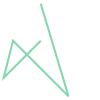

In [32]:
# line is basically similar to defining points but instead of
# a single tuple there is list of tuple.

line1 = LineString([(1,5), (4,-5), (-2,1), (-3, -3), (1,1)])
print(f"{line1} is a {type(line1)}")
line1

WKT is convenient as it is a human-readable text format that also most GIS tools can readily use

#### 2.2 LineString properties and methods

In [35]:
# constituent points - using the coords attribute
list(line1.coords)

[(1.0, 5.0), (4.0, -5.0), (-2.0, 1.0), (-3.0, -3.0), (1.0, 1.0)]

In [38]:
# array of x and y coords of constituent points
line1.xy

(array('d', [1.0, 4.0, -2.0, -3.0, 1.0]),
 array('d', [5.0, -5.0, 1.0, -3.0, 1.0]))

In [39]:
line1.length

28.70554775825916

POINT (0.648704894600754 -0.9318938223671597)


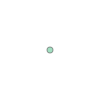

In [42]:
print(line1.centroid)
line1.centroid

#### 3.1 Polygons

In [48]:
from shapely.geometry import Polygon
from shapely.geometry import LinearRing

POLYGON ((1 2, -1 5, -4 -8, 3 -5, 3 7, 1 2)) is of <class 'shapely.geometry.polygon.Polygon'>


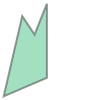

In [46]:
# no hole - using coordinate list
polygon1 = Polygon([(1,2), (-1, 5), (-4, -8), (3, -5), (3,7)])
print(f"{polygon1} is of {type(polygon1)}")
polygon1

POLYGON ((1 2, -1 5, -4 -8, 3 -5, 3 7, 1 2)) is of <class 'shapely.geometry.polygon.Polygon'>


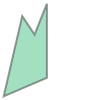

In [51]:
# no hole - using linear ring
ploy_ring1 = LinearRing([(1,2), (-1, 5), (-4, -8), (3, -5), (3,7)])
polygon2 = Polygon(ploy_ring1)
print(f"{polygon2} is of {type(polygon2)}")
polygon2

In [50]:
# two appraoch match?
polygon2 == polygon1

True

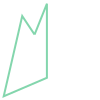

In [52]:
# hole - outer linear ring
outer = ploy_ring1
outer

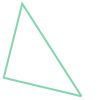

In [70]:
# hole - inner ring
hole = LinearRing([(2.2, -3), (-1, 2), (-2, -2)])
hole

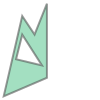

In [72]:
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

In [73]:
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumference: {polygon_with_hole.exterior.length}")


Polygon centroid: POINT (0.1463617463617463 -1.6999306999306998)
Polygon area: 48.1
Polygon bounding box: (-4.0, -8.0, 3.0, 7.0)
Polygon exterior ring: LINEARRING (1 2, -1 5, -4 -8, 3 -5, 3 7, 1 2)
Polygon circumference: 41.94815325258873


In [74]:
# validity of geometry - identify topological errors
polygon_with_hole.is_valid

True